In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Earliest and latest dates from measurements in table
earlieststr = session.query(measurement.date).order_by(measurement.date).first()
lateststr = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Earliest record: {earlieststr[0]} , Latest record: {lateststr[0]}")

Earliest record: 2010-01-01 , Latest record: 2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
#Convert latest date into a datetime object to be sorted

latest_date = dt.datetime.strptime(lateststr[0], '%Y-%m-%d')
date_query = dt.date(latest_date.year - 1, latest_date.month, latest_date.day)
date_query

datetime.date(2016, 8, 23)

In [14]:
#Create a select statement for query and save query

select = [measurement.date,measurement.prcp]
query_result = session.query(*select).filter(measurement.date >= date_query).all()

In [14]:
# Create dataframe using pandas to input query results, drop null entries, sort the dataframe by date

precipitation_df = pd.DataFrame(query_result, columns = ['Date','Precipitation'])
precipitation_df = precipitation_df.dropna(how='any')
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


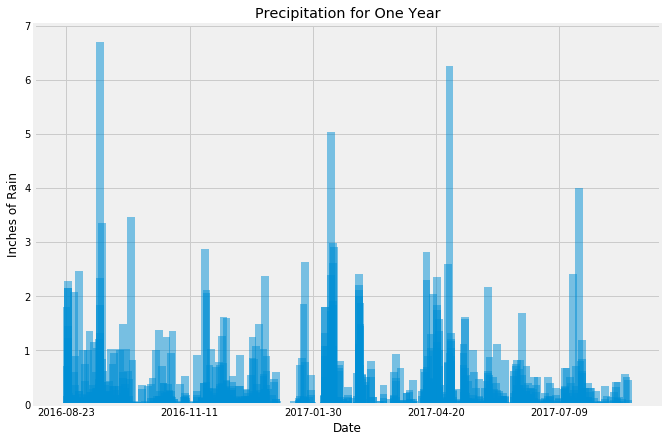

In [15]:
# Plot dataframe using matplotlib

x_axis = precipitation_df.index.tolist()
y_axis = precipitation_df['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x_axis,y_axis,width=5,alpha=0.5,align="center")
x_ticks = np.arange(0,400,80)
plt.xticks(x_ticks)
plt.title("Precipitation for One Year")
plt.xlabel("Date")
plt.ylabel("Inches of Rain")
plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

select = [measurement.station,func.count(measurement.id)]
station_activity = session.query(*select).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

select = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active_station = session.query(*select).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
most_active_station

(54.0, 85.0, 71.66378066378067)

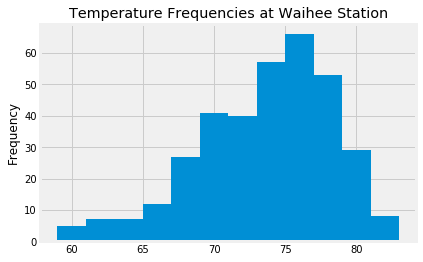

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_result = session.query(measurement.tobs).\
    filter(measurement.station == station_activity[0][0]).\
    filter(measurement.date >= date_query).all()
temps = list(np.ravel(query_result))

plt.hist(temps, bins=12)
plt.ylabel("Frequency")
plt.title("Temperature Frequencies at Waihee Station")
plt.show()